<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [29]:
from google.colab import drive
drive.mount('/content/drive/')
path_name = "/content/drive/"
print('!ls {path_name}:')
!ls {path_name}
print()
mydrive_name = path_name + 'MyDrive'
print('!ls {mydrive_name}:')
!ls {mydrive_name}
print()
log_folder = path_name + 'MyDrive/' + 'log/'
print('log_folder:', log_folder)
print('!ls {log_folder}:')
!ls {log_folder}

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
!ls {path_name}:
MyDrive

!ls {mydrive_name}:
 07_Colab_hand_write.ipynb      16_TB_colab.ipynb   dataset   PlantVillage   saved_models
 13_NN_TF_Scratch_colab.ipynb  'Colab Notebooks'    log       potatoes.h5

log_folder: /content/drive/MyDrive/log/
!ls {log_folder}:
train


In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [19]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [20]:
len(X_train)

60000

In [21]:
len(X_test)

10000

In [22]:
X_train[0].shape

(28, 28)

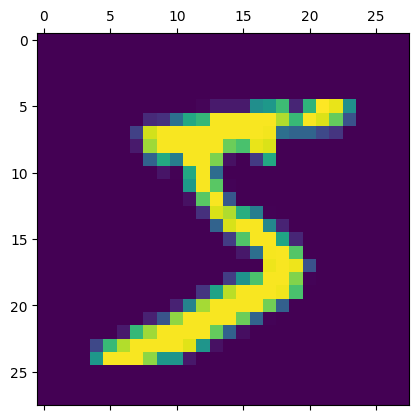

In [23]:
plt.matshow(X_train[0])

In [24]:
y_train[0]

5

In [25]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [27]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
print('log_folder:', log_folder)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_folder, histogram_freq=1)
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

log_folder: /content/drive/MyDrive/log/
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2744 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0842 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9845


In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_folder, histogram_freq=1)
model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6348 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3353 - accuracy: 0.9069
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2858 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9289
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2325 - accuracy: 0.9354


In [39]:
%ls
%load_ext tensorboard
#%tensorboard --logdir logs
%tensorboard --logdir {log_folder}

drive/  logs/  sample_data/


<IPython.core.display.Javascript object>

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [40]:
model.get_weights()

[array([[-0.04506163,  0.08233698, -0.03884606, ...,  0.07769468,
          0.02050623,  0.03535067],
        [ 0.00192733, -0.01204553,  0.03507762, ...,  0.02968086,
          0.04317482,  0.06366871],
        [ 0.07069604, -0.07058968,  0.02426206, ...,  0.06079534,
         -0.01708991, -0.05471314],
        ...,
        [-0.0663067 ,  0.02271818, -0.04002054, ...,  0.02590893,
         -0.05923285, -0.07988491],
        [ 0.05421478,  0.07221921,  0.03587712, ..., -0.07270809,
          0.02766389, -0.07066283],
        [ 0.06695038, -0.04037546, -0.01134671, ...,  0.02001481,
         -0.07673033,  0.02201515]], dtype=float32),
 array([-0.00319857,  0.04295489, -0.04331815,  0.05982193,  0.02109948,
        -0.03083689, -0.02652267,  0.03197734,  0.04564571,  0.00766311,
         0.00846948, -0.01731388,  0.0616306 ,  0.0488578 ,  0.03264067,
        -0.00241603,  0.01856942,  0.11214644, -0.00987589, -0.00316662,
         0.00335776,  0.07520477,  0.03072247,  0.01165574, -0.036